[15.  10.8  5.4 19.4 -0.6 20.2 20.8 19.6]
[33.6 30.4 27.6 42.4 25.3 48.2 55.4 64.1]
[18.6 19.6 22.2 23.  25.9 28.  34.6 44.5]


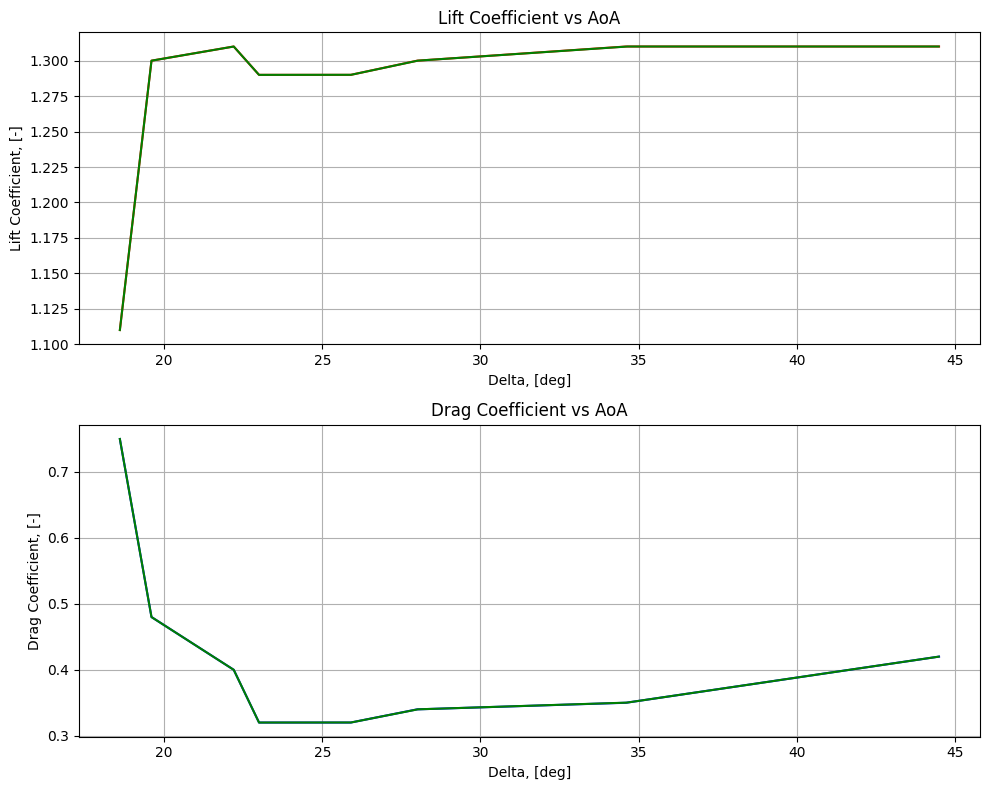

In [61]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

n_nodes = 8
max_wind = 13

# Define wind speed
v_wind = np.ones(n_nodes) * max_wind

# Define the tangential component
u_r = np.array([19.55, 22.19, 24.84, 14.25, 27.48, 11.61, 8.96, 6.31])

# Define angles
alpha = np.array([15.0, 10.8, 5.4, 19.4, -0.60, 20.20, 20.80, 19.60])
beta = np.degrees(np.arctan2(v_wind, u_r)).round(1)
delta = beta - alpha

print(alpha)
print(beta)
print(delta)

# Define aerodynamic coefficients
cl_list = np.array([1.11, 1.30, 1.31, 1.29, 1.29, 1.30, 1.31, 1.31])
cw_list = np.array([0.75, 0.48, 0.40, 0.32, 0.32, 0.34, 0.35, 0.42])

# Interpolate the aerodynamic coefficients

cl_cubic = sp.interpolate.interp1d(x=delta, y=cl_list, kind='linear')
cw_cubic = sp.interpolate.interp1d(x=delta, y=cw_list, kind='linear')

# Regression to get the aerodynamic coefficients

# cl_cubic = np.poly1d(np.polyfit(delta, cl_list, 5))
# cw_cubic = np.poly1d(np.polyfit(delta, cw_list, 5))

delta_test = np.arange(np.min(delta), np.max(delta), 0.01)
cl_test = cl_cubic(delta_test)
cw_test = cw_cubic(delta_test)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(delta, cl_list, 'r')
ax[0].plot(delta_test, cl_test, 'g')
# ax[0].plot(delta_test, cl_cubic(delta_test), 'b')
ax[0].set_title('Lift Coefficient vs AoA')
ax[0].set_xlabel('Delta, [deg]')
ax[0].set_ylabel('Lift Coefficient, [-]')
ax[0].grid()

ax[1].plot(delta, cw_list, 'b')
ax[1].plot(delta_test, cw_test, 'g')
# ax[1].plot(delta_test, cw_cubic(delta_test), 'r')
ax[1].set_title('Drag Coefficient vs AoA')
ax[1].set_xlabel('Delta, [deg]')
ax[1].set_ylabel('Drag Coefficient, [-]')
ax[1].grid()

plt.tight_layout()
plt.show()



